In [50]:
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

im = Image.open("./train_data/walkable_mask.png")

walkable_mask = np.asarray(im, dtype=bool) == 0

In [51]:
# Load training_walks.csv
training_walks = pd.read_csv("./train_data/training_walks.csv")

print(training_walks.shape)
training_walks.head()


(1600000, 8)


,Unnamed: 0,transmitter,walk,i,j,rssi,tx_location_i,tx_location_j
0,0,tx0,0,2214,1812,-1000.0,1716,1337
1,1,tx0,0,2209,1812,-1000.0,1716,1337
2,2,tx0,0,2209,1817,-1000.0,1716,1337
3,3,tx0,0,2209,1822,-1000.0,1716,1337
4,4,tx0,0,2204,1822,-1000.0,1716,1337


In [52]:
only_tx0 = training_walks[training_walks["transmitter"] == "tx4"]
# filter all rssi values less than -400
only_tx0 = only_tx0[only_tx0["rssi"] > -999]

only_tx0.shape

(117827, 8)

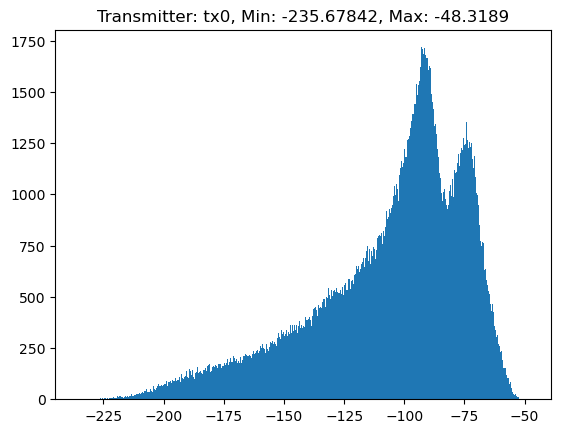

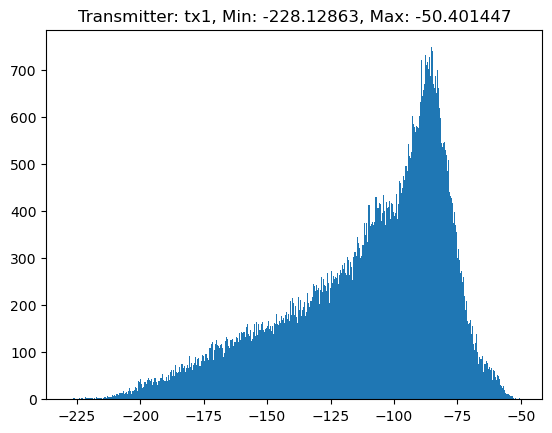

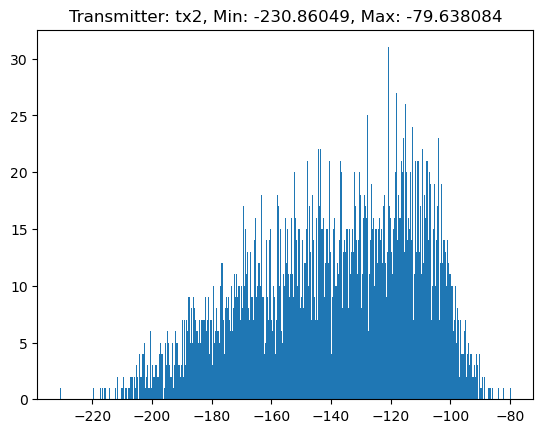

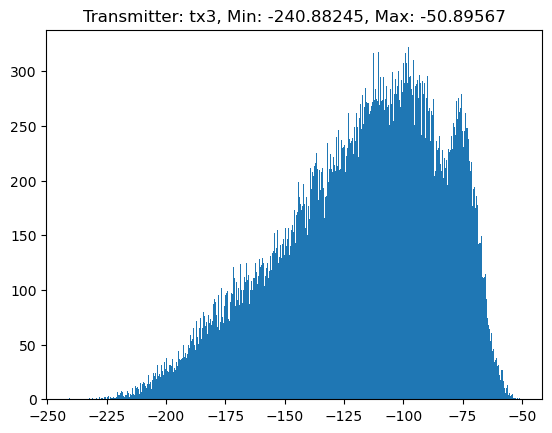

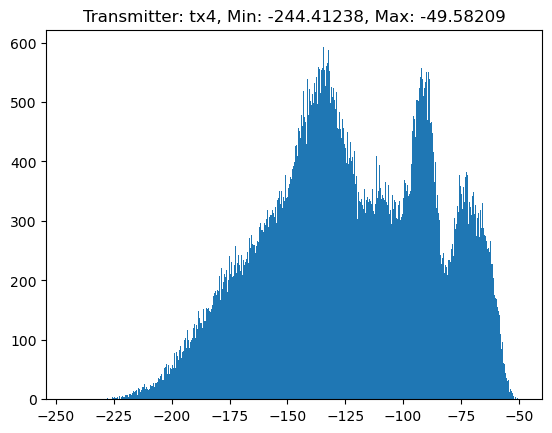

In [53]:
all_transmitters = training_walks["transmitter"].unique()
for transmitter in all_transmitters:
    for_this_transmitter = training_walks[training_walks["transmitter"] == transmitter]
    for_this_transmitter = for_this_transmitter[for_this_transmitter["rssi"] > -999]
    rssi_min_max = for_this_transmitter["rssi"].min(), for_this_transmitter["rssi"].max()
    plt.hist(for_this_transmitter["rssi"], bins=500)
    plt.title(f"Transmitter: {transmitter}, Min: {rssi_min_max[0]}, Max: {rssi_min_max[1]}")
    plt.show()

In [54]:
unique_transmitters = training_walks["transmitter"].unique()
for transmitter in unique_transmitters:
    for_this_transmitter = training_walks[training_walks["transmitter"] == transmitter]
    rssi_less_than_999 = for_this_transmitter[for_this_transmitter["rssi"] > -999]
    print(f"transmitter: {transmitter}, num_rows: {len(for_this_transmitter)}, num_rows_less_than_999: {len(rssi_less_than_999)}")

transmitter: tx0, num_rows: 320000, num_rows_less_than_999: 225260
transmitter: tx1, num_rows: 320000, num_rows_less_than_999: 96189
transmitter: tx2, num_rows: 320000, num_rows_less_than_999: 4012
transmitter: tx3, num_rows: 320000, num_rows_less_than_999: 64853
transmitter: tx4, num_rows: 320000, num_rows_less_than_999: 117827


In [55]:
# Unique transmitters in the original data set
unique_transmitters = training_walks["transmitter"].unique()
print(unique_transmitters)

# 10 unique colors for the transmitters
colors = plt.cm.tab10.colors

print(colors)


for i,transmitter in enumerate(unique_transmitters):
    # Create a copy of the walkable mask to visualize the RSSI values
    rssi_map = np.zeros((walkable_mask.shape[0], walkable_mask.shape[1], 3), dtype=np.uint8)

    # Set the background to white
    rssi_map[walkable_mask] = [32, 32, 32]  # White for walkable areas
    rssi_map[~walkable_mask] = [0, 0, 0]       # Black for non-walkable areas

    color = colors[i]
    # Scale color to be between 0 and 255
    r,g,b = 0,255,0

    transmitter_data =  training_walks[training_walks["transmitter"] == transmitter]
    # Filter out any rows where rssi is less than -400
    thresholded_transmitter_data = transmitter_data[transmitter_data["rssi"] > -400]
    min_rssi,max_rssi = thresholded_transmitter_data["rssi"].min(), thresholded_transmitter_data["rssi"].max()

    print(f"transmitter: {transmitter}, min_rssi: {min_rssi}, max_rssi: {max_rssi}, num_rows: {len(transmitter_data)}")

    # Scale the rssi values to be between 0.5 and 1
    transmitter_data["rssi"] = (transmitter_data["rssi"] - min_rssi) / (max_rssi - min_rssi)
    transmitter_data["rssi"] = transmitter_data["rssi"] * 0.5 + 0.5

    # Draw all dots on the map
    for index, row in transmitter_data.iterrows():
        i, j, rssi = int(row['i']), int(row['j']), row['rssi']
        
        # Color is currently between 0 and 1, the map has 0-255 values
        # scale the color according to the rssi intensity which is also between 0 and 1
        if rssi < 0:
            # Bright blue for negative rssi
            int_color = [0, 0, 255]
        else:
            int_color = [int(r * rssi * 255), int(g * rssi * 255), int(b * rssi * 255)]
        rssi_map[j, i] = np.array(int_color).astype(np.uint8)
    
    # draw a colored circle at the transmitter location
    tx_location_i = transmitter_data.iloc[0]['tx_location_i']
    tx_location_j = transmitter_data.iloc[0]['tx_location_j']
    circle_radius = 10  # 100 pixels diameter means 50 pixels radius
    y, x = np.ogrid[:rssi_map.shape[0], :rssi_map.shape[1]]
    dist_from_center = np.sqrt((x - tx_location_i)**2 + (y - tx_location_j)**2)
    circle_mask = dist_from_center <= circle_radius 
    rssi_map[circle_mask] = [255,0,0]

    # Save the map to a file
    plt.imsave(f"./train_data/rssi_map_{transmitter}.png", rssi_map)


['tx0' 'tx1' 'tx2' 'tx3' 'tx4']
((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))
transmitter: tx0, min_rssi: -235.67842, max_rssi: -48.3189, num_rows: 320000


/var/folders/3z/qckvgx9d3f105g58dtk1vxgw0000gp/T/ipykernel_93028/552512228.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transmitter_data["rssi"] = (transmitter_data["rssi"] - min_rssi) / (max_rssi - min_rssi)
/var/folders/3z/qckvgx9d3f105g58dtk1vxgw0000gp/T/ipykernel_93028/552512228.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transmitter_data["rssi"] = transmitter_data["rssi"] * 0.5 + 0.5


transmitter: tx1, min_rssi: -228.12863, max_rssi: -50.401447, num_rows: 320000
transmitter: tx2, min_rssi: -230.86049, max_rssi: -79.638084, num_rows: 320000
transmitter: tx3, min_rssi: -240.88245, max_rssi: -50.89567, num_rows: 320000
transmitter: tx4, min_rssi: -244.41238, max_rssi: -49.58209, num_rows: 320000


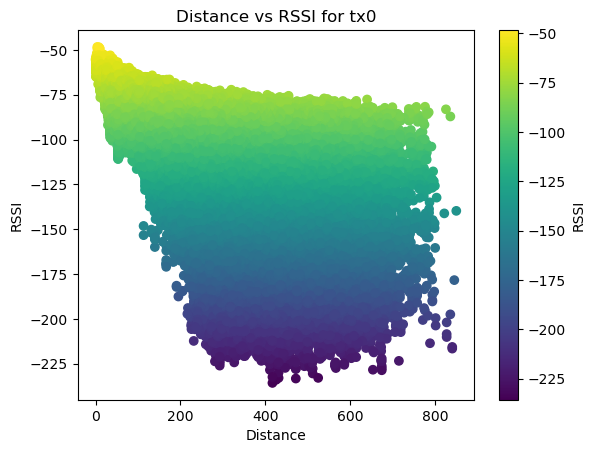

In [56]:
tx0_data = training_walks[training_walks["transmitter"] == "tx0"]
tx0_data = tx0_data[tx0_data["rssi"] > -999]

# For each row in tx0_data, compute the distance from this point to the transmitter location
tx0_data["distance"] = np.sqrt((tx0_data["i"] - tx0_data["tx_location_i"])**2 + (tx0_data["j"] - tx0_data["tx_location_j"])**2)

# Plot the distance vs rssi
# the color intensity is the rssi
plt.scatter(tx0_data["distance"], tx0_data["rssi"], c=tx0_data["rssi"], cmap="viridis")
plt.colorbar(label="RSSI")
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Distance vs RSSI for tx0")
plt.show()



In [94]:
tx0_data = training_walks[training_walks["transmitter"] == "tx0"]
tx0_data = tx0_data[tx0_data["rssi"] > -999]
blocked_data = []

min_max_rssi = tx0_data["rssi"].min(), tx0_data["rssi"].max()
# normalize the rssi values to be between 0 and 1
tx0_data["rssi"] = (tx0_data["rssi"] - min_max_rssi[0]) / (min_max_rssi[1] - min_max_rssi[0])

# Create a copy of the walkable mask to visualize the RSSI values
rssi_map = np.zeros((walkable_mask.shape[0], walkable_mask.shape[1], 3), dtype=np.uint8)

# Set the background to white
rssi_map[walkable_mask] = [82, 82, 82]
rssi_map[~walkable_mask] = [0, 0, 0]

# Scale color to be between 0 and 255
r,g,b = 255,0,0

# Zero fill the cells_by_ij dictionary
cells_by_ij = np.zeros((walkable_mask.shape[0], walkable_mask.shape[1]))
# create a dictionary of cells by i,j
# for all the tx0_data, add the i,j to the dictionary
for index, row in tx0_data.iterrows():
    i, j = row["i"], row["j"]
    cells_by_ij[j,i] = row["rssi"]

for i in range(walkable_mask.shape[0]):
    for j in range(walkable_mask.shape[1]):
        if walkable_mask[i,j]:
            continue

        cell_size = 20

        rssi_values = cells_by_ij[i-cell_size//2:i+cell_size//2, j-cell_size//2:j+cell_size//2]
        walkable_values = walkable_mask[i-cell_size//2:i+cell_size//2, j-cell_size//2:j+cell_size//2]
        # only the walkable values that are false
        walkable_values = walkable_values == False
        
        if len(walkable_values) == 0:
            continue
        
        walkable_rssi_values = rssi_values[walkable_values]

        if len(walkable_rssi_values) == 0:
            continue

        avg_rssi = np.mean(walkable_rssi_values)

        # Overwrite this with just the known value from this cell
        #avg_rssi = cells_by_ij[i,j]

        color = [int(r * avg_rssi * 255), int(g * avg_rssi * 255), int(b * avg_rssi * 255)]
        rssi_map[i,j] = np.array(color).astype(np.uint8)


# Save the map to a file
plt.imsave(f"./train_data/blocked_map.png", rssi_map)
